# <center> Customer Sales Activity Prediction using historic Data

In [65]:
# Part One Set Environment and Get libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


## Data Importing and Basic EDA

In [3]:
# Part two Data Importing
df = pd.read_csv('Sales_data.csv')

In [4]:
#Basics EDA Data
print(df.info())
print("*"*100)
print(df.describe(include = 'all'))
print("*"*100)
print(df.head(20))
print("*"*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
****************************************************************************************************
             User ID  Gender         Age  EstimatedSalary   Purchased
count   4.000000e+02     400  400.000000       400.000000  400.000000
unique           NaN       2         NaN              NaN         NaN
top              NaN  Female         NaN              NaN         NaN
freq             NaN     204         NaN              NaN         NaN
mean    1.569154e+07     NaN   37.655000     69742.500000    0.357500
std 

In [5]:
#Data Na value count
display(df.isnull().sum()) 
#No missing values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Simple Data Visualizations

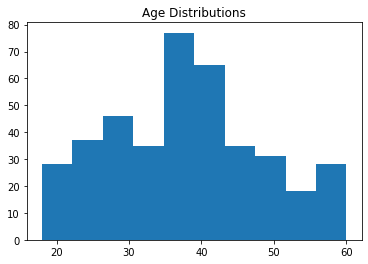

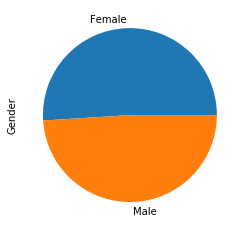

In [6]:
plt.hist(df['Age'])
plt.title('Age Distributions')
plt.show()
df.Gender.value_counts().plot(kind='pie')


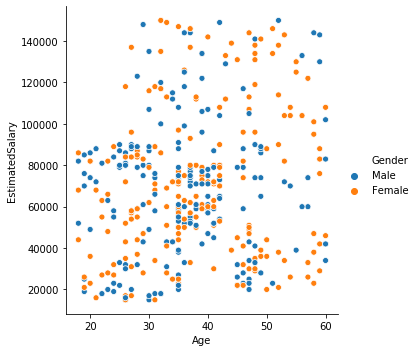

In [7]:
sns.relplot(x="Age", y="EstimatedSalary",hue="Gender", data=df)

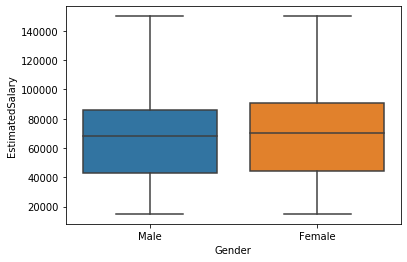

In [8]:
ax = sns.boxplot(x="Gender", y="EstimatedSalary", data=df) #hmm No biases here

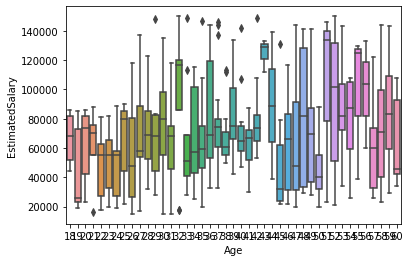

In [9]:
sns.boxplot(x="Age", y="EstimatedSalary", data=df) #Bad design, Form Age Data brackets and try again

18 60


Text(0.5, 1.0, 'Age vs Income Distribution')

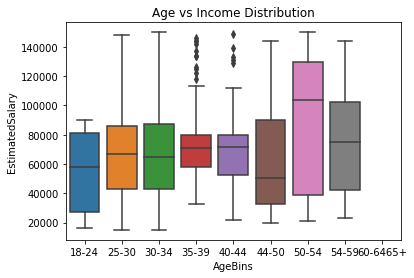

In [10]:
print(df['Age'].min(), df['Age'].max())
bins = [18,25,30,35,40,45,50,55,60,65]
labels = ['18-24','25-30', '30-34','35-39','40-44','44-50', '50-54','54-59','60-64' '65+']
df['AgeBins'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)
sns.boxplot(x="AgeBins", y="EstimatedSalary", data=df).set_title("Age vs Income Distribution")

## Data Preperation

In [11]:
#Drop UserID AgeBing
df.drop(columns = ['User ID', 'AgeBins'], inplace = True)

In [12]:
# One hot encoding for Male-Female
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace = True)

## Data Splitting 

In [13]:
X = df.iloc[:, [0,1,2]].values
y = df.iloc[:, 3].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Data Modelling

In [15]:
print(X,y)

[[    1    19 19000]
 [    1    35 20000]
 [    0    26 43000]
 ...
 [    0    50 20000]
 [    1    36 33000]
 [    0    49 36000]] [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
cm #This is wrong, our predictor is saying everyone purchased, some problem here.

array([[68,  0],
       [32,  0]], dtype=int64)

### Adjusting Scaling Issues

In [67]:
#Scale the data

X = df.iloc[:, [0,1,2]].values
y = df.iloc[:, 3].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
print(X_train_scaled[:20])

[[-0.98019606  0.58164944 -0.88670699]
 [ 1.02020406 -0.60673761  1.46173768]
 [-0.98019606 -0.01254409 -0.5677824 ]
 [-0.98019606 -0.60673761  1.89663484]
 [-0.98019606  1.37390747 -1.40858358]
 [-0.98019606  1.47293972  0.99784738]
 [ 1.02020406  0.08648817 -0.79972756]
 [ 1.02020406 -0.01254409 -0.24885782]
 [-0.98019606 -0.21060859 -0.5677824 ]
 [-0.98019606 -0.21060859 -0.19087153]
 [-0.98019606 -0.30964085 -1.29261101]
 [ 1.02020406 -0.30964085 -0.5677824 ]
 [ 1.02020406  0.38358493  0.09905991]
 [-0.98019606  0.8787462  -0.59677555]
 [-0.98019606  2.06713324 -1.17663843]
 [ 1.02020406  1.07681071 -0.13288524]
 [-0.98019606  0.68068169  1.78066227]
 [-0.98019606 -0.70576986  0.56295021]
 [-0.98019606  0.77971394  0.35999821]
 [-0.98019606  0.8787462  -0.53878926]]


In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_scaled, y_train)
y_pred_lr = classifier.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
cm_scaled = confusion_matrix(y_test, y_pred_lr)

In [20]:
print('Logistics Regression Results')
print(cm_scaled) # looks better
print("*"*100)

Logistics Regression Results
[[65  3]
 [ 7 25]]
****************************************************************************************************


## Some more ML models 

In [23]:
def printConfusionMatrix(model_name, y_true, y_pred):
    print(model_name + " " + 'results')
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print("*"*100)
    

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifierknn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
classifierknn.fit(X_train_scaled, y_train)
y_pred_knn = classifierknn.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print('KNN results')
print(cm_knn)
print("*"*100)

from sklearn.svm import SVC
classifiersvc = SVC(kernel = 'rbf', random_state = 0)
classifiersvc.fit(X_train_scaled, y_train)
# Predicting the Test set results
y_pred_svm = classifiersvc.predict(X_test_scaled)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Support Vector Machine Results')
print(cm_svm)
print("*"*100)


#Decision tree without scaling, lets see wt happens
from sklearn.tree import DecisionTreeClassifier
classifierdt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierdt.fit(X_train, y_train)
y_pred_dt = classifierdt.predict(X_test)
#Lets write a simple function to avoid repetitive print statement
printConfusionMatrix("Decision Tree Normal",y_test,y_pred_dt)

#Decision tree with scaling, lets see wt happens
from sklearn.tree import DecisionTreeClassifier
classifierdtsc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierdtsc.fit(X_train_scaled, y_train)
y_pred_dtsc = classifierdtsc.predict(X_test_scaled)
printConfusionMatrix("Decision Tree Scaled",y_test,y_pred_dtsc)


#Random Forest Modelling
from sklearn.ensemble import RandomForestClassifier
classifierrf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierrf.fit(X_train_scaled, y_train)
y_pred_rf = classifierrf.predict(X_test_scaled)
printConfusionMatrix("Random Forest Scaled",y_test,y_pred_rf)

KNN results
[[64  4]
 [ 3 29]]
****************************************************************************************************
Support Vector Machine Results
[[64  4]
 [ 3 29]]
****************************************************************************************************
Decision Tree Normal results
[[63  5]
 [ 3 29]]
****************************************************************************************************
Decision Tree Scaled results
[[63  5]
 [ 3 29]]
****************************************************************************************************
Random Forest Scaled results
[[64  4]
 [ 4 28]]
****************************************************************************************************


# Result Interpretation

In [39]:
result_df = pd.DataFrame()
result_df['Actual'] = y_test
result_df['LR_predictions'] = y_pred_lr
result_df['KNN_preditions'] = y_pred_knn
result_df['SVM_predictions'] = y_pred_svm
result_df['DT_predictions'] = y_pred_dt
result_df['RF_predictions'] = y_pred_rf

In [38]:
result_df

,Actual,LR_predictions,KNN_preditions,SVM_predictions,DT_predictions,RF_predictions
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
95,1,0,0,0,1,0
96,0,0,0,0,0,0
97,1,0,1,1,1,1
98,1,1,1,1,1,1


In [53]:


accuracy_score(result_df['Actual'], result_df['LR_predictions'])
f1_score(result_df['Actual'], result_df['LR_predictions'], average='binary')
precision_score(result_df['Actual'], result_df['LR_predictions'], average='binary')
recall_score(result_df['Actual'], result_df['LR_predictions'], average='binary')

0.78125

In [64]:
for each in result_df.columns:
    if each != 'Actual':
        print(each)
        print("Accuray for "+ each + " ",accuracy_score(result_df['Actual'], result_df[each]))
        print("F1 Score for "+ each + " ",f1_score(result_df['Actual'], result_df[each], average='binary'))
        print("Precision for "+ each + " ",precision_score(result_df['Actual'], result_df[each], average='binary'))
        print("Recall for "+ each + " ",recall_score(result_df['Actual'], result_df[each], average='binary'))
        print('*'*100)

LR_predictions
Accuray for LR_predictions  0.9
F1 Score for LR_predictions  0.8333333333333334
Precision for LR_predictions  0.8928571428571429
Recall for LR_predictions  0.78125
****************************************************************************************************
KNN_preditions
Accuray for KNN_preditions  0.93
F1 Score for KNN_preditions  0.8923076923076922
Precision for KNN_preditions  0.8787878787878788
Recall for KNN_preditions  0.90625
****************************************************************************************************
SVM_predictions
Accuray for SVM_predictions  0.93
F1 Score for SVM_predictions  0.8923076923076922
Precision for SVM_predictions  0.8787878787878788
Recall for SVM_predictions  0.90625
****************************************************************************************************
DT_predictions
Accuray for DT_predictions  0.92
F1 Score for DT_predictions  0.8787878787878787
Precision for DT_predictions  0.8529411764705882
Recall f

https://towardsdatascience.com/roc-curve-explained-using-a-covid-19-hypothetical-example-binary-multi-class-classification-bab188ea869c

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/